<div>
<table style="width: 100%">
	<tr>
		<td>
		<table style="width: 100%">
			<tr>
                <td ><center><font size="5"><b>Module 49</b></font><center>
                <center><font size="6">Digital Innovations for Water Challenges</font><center></td>
			</tr>
			<tr>
                <td><center><font size="14">Notebook 2a</font><center></td>
			</tr>
			<tr>
                <td><center><font size="6"><b>Zonal Statistics</b></font><center></td>
			</tr>
		</table>
		</td>
		<td><center><img src='images\ihe-delft-institute_unesco_fc-lr.jpg'></img></td>
	</tr>
</table>
</div>

# Table of contents
1. [Learning objectives](#learningobs)
2. [Introduction to Zonal Statistics](#introduction)
3. [An example](#Example)

# 1. Learning objectives<a name="learningobs"></a>

- Understand what Zonal Statistics is.
- Compute Zonal Statistics from raster file using python. 

# 2. Introduction<a name="introduction"></a>


In water resources management we often work with spatial data (raster data). Many of the spatial data manipulation are easier with python than with GIS software. Think of repeatability and speed!<br>
An example of a commonly used type of spatial data - the land cover map:
<figure>
<img src="./2a_Data/Upper Litani_LLC_2017_thumbnail.png" style="width:75%">
</figure>


#### Vector vs Raster
<figure>
<img src="./2a_Data/zstat2_thumbnail.png" style="width:40%">
<figcaption align = "center">Vectors (first line) vs. rasters (second line) </figcaption>
</figure>

Raster data has its data represented in a grid matrix or cells organized into rows and columns. On the other hand, information in vector data utilizes vertices or sequential points. Polygons, lines, and points are used to represent data in vector formats.

The type of data represented in raster data is continuous, while vector data is discrete. For instance, details concerning temperature, soil PH, flow, elevation, distance, and air pressure are examples of raster data. Examples of vector data include rivers, linear features, and administrative borders. Note that some raster data can be represented as vectors by simplifying it to isolines (commonly used for e.g. elevation or temperature).<br> The type of data to be represented determines the type of spatial data to be used. Some of spatial data formats are: Geotiff, Shapefile, Geojson, KML, Geopackage, Spatialite. You can read <a href="https://www.e-education.psu.edu/geog585/node/691">here</a> and <a href="https://gisgeography.com/gis-formats/">here</a> about spatial data formats.

### Zonal statistics
A zone is all the cells in a raster that have the same value, regardless of whether or not they are contiguous. Zones can also be in vector format, they will then be represented by pologons sharing one attribute.
<figure>
<img src="./2a_Data/zstat1_thumbnail.png" style="width:40%">
<figcaption align = "center"> Four zones in this raster. </figcaption>
</figure>

We can calculate different statistics for each zone: Total, Mean, Median, Standard deviation, Min and max, etc.


## 3 - An example <a name="Example"></a>
### 3.1 - Zonal stat from two raster files
We will compute evapotranspiration per land cover class from two raster files. We need two raster files. One for the land cover class which specifies for each grid a value representing its land cover type. The other is evapotranspiration raster which specifies the monthly evapotranspiration value in mm for each grid.

For this example, we use data for a small river basin called Upper Litani in Lebanon. The data are obtained from the  <a href="https://wapor.apps.fao.org/home/WAPOR_2/1">WaPOR</a> database. In the figure below, the first layer represents the land cover class raster, the second layer resents the evapotranspiration raster and the bar chart represents the statistics we would like to calculate.

<figure>
<img src="./2a_Data/zonal_stat2_thumbnail.png" style="width:30%">
<figcaption align = "center"> Calculate Zonal statistics. <a href="https://bikeshbade.com.np/tutorials/Detail/?title=Calculate%20Zonal%20Statistics%20and%20export%20as%20CSV&code=33">Source</a></figcaption>

    
</figure>

### Read the raster files and the land cover class description
The raster can be found in the data folder and the land cover class description are obtained from WaPOR database

In [9]:
import numpy as np
import xarray as xr
import rioxarray as rio
import os

# path to the LCC data 
lcc_file = r'./2a_Data/lcc.tiff'
# open lcc file 
LCC = rio.open_rasterio(lcc_file)
LCC = LCC.squeeze(dim = 'band', drop = True)
LCC = LCC.rio.write_crs("epsg:4326", inplace=True)
LCC = LCC.rename({'x': 'longitude','y': 'latitude'})

# path to the evapotranspiration data 
et_file = r'./2a_Data/et_2017.tif'
et = rio.open_rasterio(et_file)
et = et.squeeze(dim = 'band', drop = True)
et = et.rio.write_crs("epsg:4326", inplace=True)
et = et.rename({'x': 'longitude','y': 'latitude'})

## land cover classes in WaPOR Landuse data
lcc_dict = {
                0: 'No data',
                20:	 'Shrubland',
                30:	 'Grassland', 
                41:	 'Cropland, rainfed',
                42:	 'Cropland, irrigated', 
                43:	 'Cropland, fallow', 
                50:	 'Built-up', 
                60:	 'Bare/sparse vegetation', 
                70:	 'Permanent  snow/ice', 
                80:	 'Water bodies', 
                81:	 'Temporary water bodies', 
                90:	 'Shrub, flooded', 
                111:  'Tree: closed, evergreen needle-leaved', 
                112: 'Tree: closed, evergreen broadleaved', 
                114: 'Tree: closed, deciduous broadleaved', 
                115: 'Tree: closed, mixed type', 
                116: 'Tree: closed, unknown type', 
                121: 'Tree: open, evergreen needle-leaved', 
                122: 'Tree: open, evergreen broadleaved', 
                123: 'Tree: open, deciduous needle-leaved', 
                124: 'Tree: open, deciduous broadleaved', 
                125: 'Tree: open, mixed type',
                126: 'Tree: open, unknown type', 
                200: 'Sea wate'
             }


In [10]:
# All the land cover classes (lcc) may not be present in our raster file. so we need to filter the lcc which are in 
# our data and prepare a new lcc dict
lcc_unq=np.unique(LCC.values[~np.isnan(LCC.values)])
new_lcc_dict = {k: lcc_dict[k] for k in lcc_unq if k in lcc_dict}

new_lcc_dict
# change dict values to list
lcc_values = list(new_lcc_dict.values())
# change list ket to list
lcc_keys = list(new_lcc_dict.keys())



In [11]:
# Now we can loop through the lcc and calculate mean values of the evapotranspiration for each lcc
et_lst=[] 
for code in new_lcc_dict.keys():
    code=float(code)
    
    #mask the lcc type based on the code
    mask = xr.where(LCC==code, 1,0)

    #et 
    ds_lcc = et.where(mask, drop=True).mean()
    code_et = ds_lcc.values.tolist()
    et_lst.append(code_et)

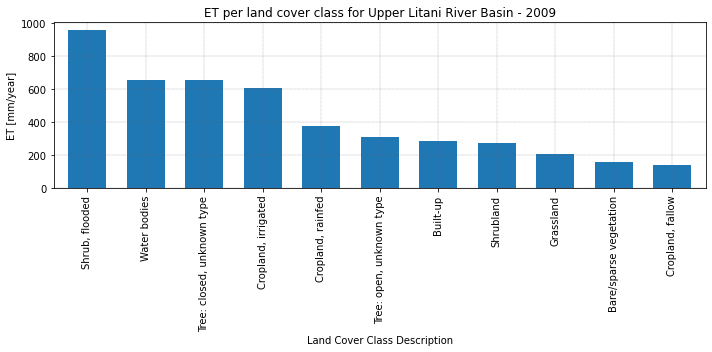

In [12]:
# Once we get the et per lcc, we can create a dataframe from the data and save it to a file and plot it for visulaization
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe from ET and LCC data
lcc_keys = list(new_lcc_dict)
data={'LU Code':lcc_keys,'Land Cover Class Description':lcc_values,
        'Evapotranspiration (mm/year)':et_lst}
df=pd.DataFrame(data)
df = df.sort_values('Evapotranspiration (mm/year)',ascending=False)

# write the dataframe to file
df.to_csv(os.path.join(r'./2a_Data/ETperLCC_Kherlen.csv'),sep=',')

# plot the data
df.index = df['Land Cover Class Description']
ax = df['Evapotranspiration (mm/year)'].plot.bar(rot=90, width=0.65, figsize=(10,5))
ax.grid(visible=True, which='Major', color='0.4',linestyle='--', linewidth=0.25, zorder = 0) #Grid line
                 
ax.set_xlabel("Land Cover Class Description")
ax.set_ylabel('ET [mm/year]')
plt.title('ET per land cover class for Upper Litani River Basin - 2009')
plt.tight_layout()

# save the plot to file 
plt.savefig(os.path.join(r'./2a_Data/ET_per_LCC_Kherlen_RB.png'), bbox_inches='tight', dpi=600)
plt.show()

#### Compute P-ET per land cover class

<div class="alert alert-success">

**EXERCISE 2**:

* Compute mean P-ET per land cover class for Upper Litani River Basin.
    

<details>
  <summary>Hints</summary>

* Follow the same step to read the precipitation data, compute precipitation (P) minus evapotranspiration (ET) and follow similar steps to compute mean P-ET.

</details>
    
</div>